# hand drawing selection boxes around cars
Here's your chance to be a human vehicle detector! In this lesson, you will be drawing a lot of bounding boxes on vehicle positions in images. Eventually, you'll have an algorithm that's spewing out bounding box positions and you'll want an easy way to plot them up over your images. So, now is a good time to get familiar with the cv2.rectangle() function (documentation) that makes it easy to draw boxes of different size, shape and color.

In this exercise, your goal is to write a function that takes as its arguments, an image, and a list of bounding box coordinates for each car. Your function should then draw bounding boxes on a copy of the image and return that as its output. 

Here, I don't actually care whether you identify the same cars as I do, or that you draw the same boxes, only that your function takes the appropriate inputs and yields the appropriate output. So here's what it should look like:

Define a function that takes an image, a list of bounding boxes, 
and optional color tuple and line thickness as inputs
then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    make a copy of the image
    draw each bounding box on your image copy using cv2.rectangle()
    return the image copy with boxes drawn

You'll draw bounding boxes with cv2.rectangle() like this:

cv2.rectangle(image_to_draw_on, (x1, y1), (x2, y2), color, thick)

In this call to cv2.rectangle() your image_to_draw_on should be the copy of your image, then (x1, y1) and (x2, y2) are the x and y coordinates of any two opposing corners of the bounding box you want to draw. color is a 3-tuple, for example, (0, 0, 255) for blue, and thick is an optional integer parameter to define the box thickness.

Have a look at the image above with labeled axes, where I've drawn some bounding boxes and "guesstimate" where some of the box corners are. You should pass your bounding box positions to your draw_boxes() function as a list of tuple pairs, like this:

bboxes = [((x1, y1), (x2, y2)), ((,),(,)), ...]



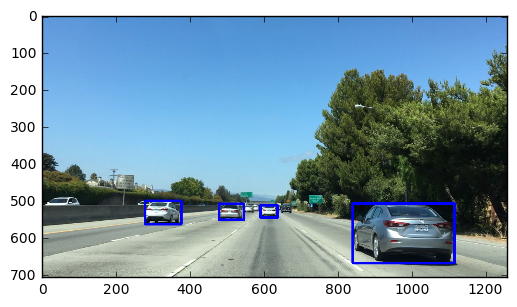

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
image = mpimg.imread('bbox-example-image.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
    
#     cv2.rectangle(image_to_draw_on, (x1, y1), (x2, y2), color, thick)
#     for i in range(len(bboxes)): 
#         cv2.rectangle(draw_img, bboxes[i][0],bboxes[i][1], color, thick)
    for box in bboxes: 
#         print(box[0])
        cv2.rectangle(draw_img, box[0],box[1], color, thick)
    return draw_img # Change this line to return image copy with boxes
# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((278, 501), (376, 564)), ((478, 509), (545, 552)), ((590,513), (636,546)), ((839,508), (1114,669))]

result = draw_boxes(image, bboxes)
plt.imshow(result)


In [2]:
bboxes = [((100, 100), (200, 200)), ((300, 300), (400, 400))]
bboxes[0][1]

(200, 200)

In [3]:
for i in range(len(bboxes)): 
    print(i) 

0
1


In [4]:
len(bboxes)

2

# Template matching 
To figure out when template matching works and when it doesn't, let's play around with the OpenCV cv2.matchTemplate() function! In the bounding boxes exercise, I found six cars in the image above. This time, we're going to play the opposite game. Assuming we know these six cars are what we're looking for, we can use them as templates and search the image for matches.




Your goal in this exercise is to write a function that takes in an image and a list of templates, and returns a list of the best fit location (bounding box) for each of the templates within the image. OpenCV provides you with the handy function cv2.matchTemplate() (documentation) to search the image, and cv2.minMaxLoc() (documentation) to extract the location of the best match.

You can choose between "squared difference" or "correlation" methods in using cv2.matchTemplate(), but keep in mind with squared differences you need to locate the global minimum difference to find a match, while for correlation, you're looking for a global maximum.

Follow along with this tutorial provided by OpenCV to try some different template matching techniques.

However, the point of this exercise is not to discover why template matching works for vehicle detection, but rather, why it doesn't! So, after you have a working implementation of the find_matches() function, try it on the second image, temp-matching-example-2.jpg, which is currently commented out.

In the second image, all of the same six cars are visible (just a few seconds later in the video), but you'll find that none of the templates find the correct match! This is because with template matching we can only find very close matches, and changes in size or orientation of a car make it impossible to match with a template.

So, just to be clear, you goal here is to:

    Write a function that takes in an image and list of templates and returns a list of bounding boxes.
    Find that your function works well to locate the six example templates taken from the first image.
    Try your code on the second image, and find that template matching breaks easily.



In [5]:
image = mpimg.imread('bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['cutout1.jpg', 'cutout2.jpg', 'cutout3.jpg',
            'cutout4.jpg', 'cutout5.jpg', 'cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list
    


 # histograms
 
 You've looked at using raw pixel intensities as features and now we'll look at histograms of pixel intensity (color histograms) as features.

I'll use the template shown below from the last exercise as an example.
 You can construct histograms of the R, G, and B channels like this:

In [6]:
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

In [7]:
# rhist[1] has the bin edges, so to calculate the bin centers: 
bin_edges = rhist[1]
bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1]) /2

In [8]:
bin_edges[1:]

array([   8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,   72.,
         80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,  144.,
        152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,  216.,
        224.,  232.,  240.,  248.,  256.])

In [9]:
bin_edges[0:len(bin_edges)-1]

array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
         72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
        144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
        216.,  224.,  232.,  240.,  248.])

In [10]:
bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1]) /2

In [11]:
bin_centers

array([   4.,   12.,   20.,   28.,   36.,   44.,   52.,   60.,   68.,
         76.,   84.,   92.,  100.,  108.,  116.,  124.,  132.,  140.,
        148.,  156.,  164.,  172.,  180.,  188.,  196.,  204.,  212.,
        220.,  228.,  236.,  244.,  252.])

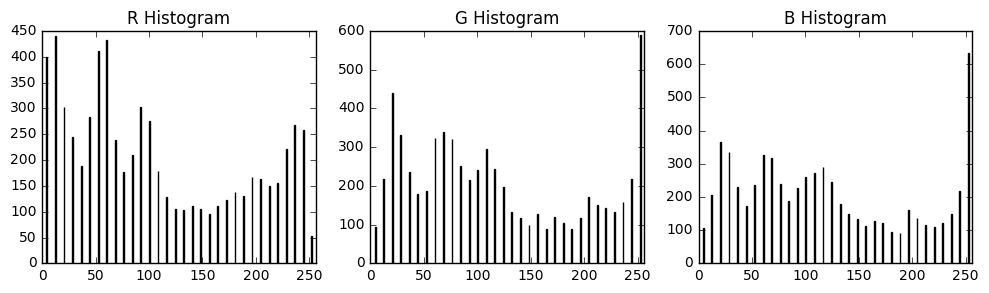

In [12]:
#  plotting a bar chart
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

In [13]:
# putting these three together become a "feature vector for the particular cutout image
hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))

In [14]:
# a function to compute histogram features 
def color_hist(img, nbins=32, bin_range=(0,256)): 
    #compute RGB histograms
    # concatenate the hostograms into a single feature vector
    # return the feature vector
    
    # Take histograms in R, G, and B
    rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
    ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
    bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
    
    # getting the bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1]) /2

    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    
    return hist_features
    
    

# 14. Exploring color spaces

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

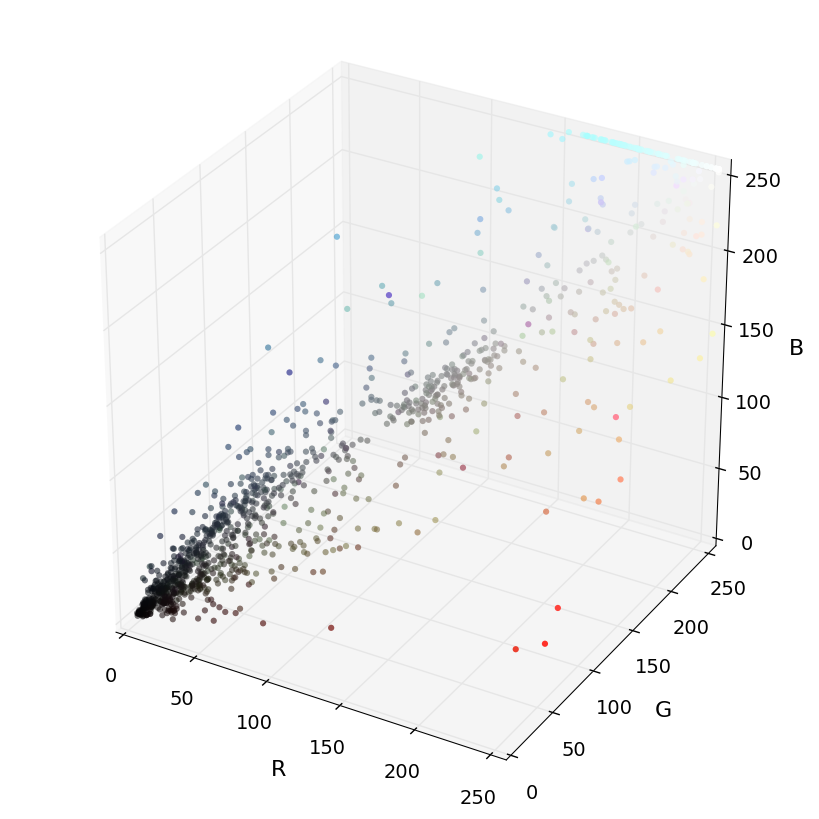

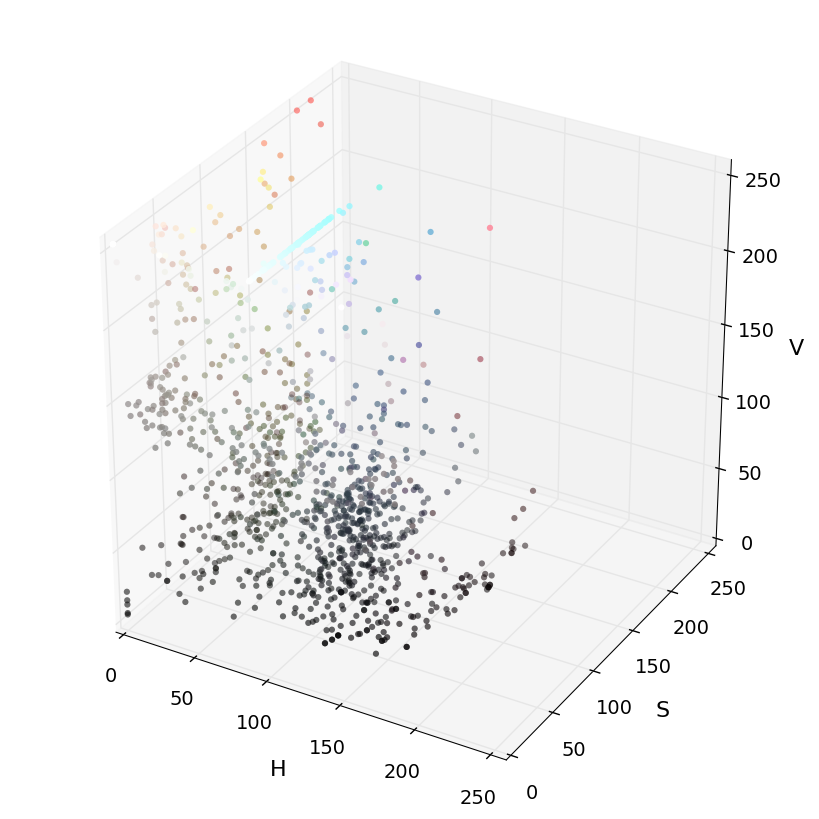

In [23]:
img = cv2.imread("000275.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
# tplotlib likes RGB

img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb,axis_labels=list("HSV"))
plt.show()


Try experimenting with different color spaces such as LUV or HLS to see if you can find a way to consistently separate vehicle images from non-vehicles. It doesn't have to be perfect, but it will help when combined with other kinds of features fed into a classifier.



# spatial binning 
You saw earlier in the lesson that template matching is not a particularly robust method for finding vehicles unless you know exactly what your target object looks like. However, raw pixel values are still quite useful to include in your feature vector in searching for cars.

While it could be cumbersome to include three color channels of a full resolution image, you can perform spatial binning on an image and still retain enough information to help in finding vehicles.

As you can see in the example above, even going all the way down to 32 x 32 pixel resolution, the car itself is still clearly identifiable by eye, and this means that the relevant features are still preserved at this resolution.

A convenient function for scaling down the resolution of an image is OpenCV's cv2.resize(). You can use it to scale a color image or a single color channel like this (you can find the original image here):

In [24]:
import cv2
import matplotlib.image as mpimg

image = mpimg.imread('test_img.jpg')
small_img = cv2.resize(image, (32, 32))
print(small_img.shape)

(32, 32, 3)




If you then wanted to convert this to a one dimensional feature vector, 
you could simply say something like:

feature_vec = small_img.ravel()
print(feature_vec.shape)
(3072,)

Ok, but 3072 elements is still quite a few features! Could you get away with even lower 
resolution? I'll leave that for you to explore later when you're training your classifier.

Now that you've played with color spaces a bit, it's probably a good time to write a 
function that allows you to convert any test image into a feature vector that you can
feed your classifier. So, you goal in this exercise is to write a function that takes
in an image, a color space conversion, and the resolution you would like to convert it 
to, and returns a feature vector. Something like this:

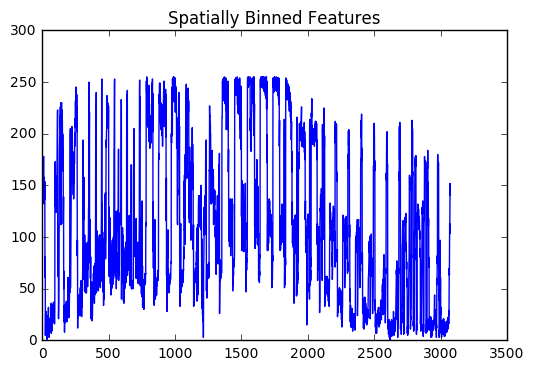

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in an image
# You can also read cutout2, 3, 4 etc. to see other examples
image = mpimg.imread('cutout1.jpg')

# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features
    
feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

# Histogram of Oriented Gradients

The scikit-image hog() function takes in a single color channel or grayscaled image as input, as well as various parameters. These parameters include orientations, pixels_per_cell and cells_per_block.

The number of orientations is specified as an integer, and represents the number of orientation bins that the gradient information will be split up into in the histogram. Typical values are between 6 and 12 bins.

The pixels_per_cell parameter specifies the cell size over which each gradient histogram is computed. This paramater is passed as a 2-tuple so you could have different cell sizes in x and y, but cells are commonly chosen to be square.

The cells_per_block parameter is also passed as a 2-tuple, and specifies the local area over which the histogram counts in a given cell will be normalized. Block normalization is not necessarily required, but generally leads to a more robust feature set. 


This is where things get a little confusing though. Let's say you are computing HOG features for an image like the one shown above that is 64×64 pixels. If you set pixels_per_cell=(8, 8) and cells_per_block=(2, 2) and orientations=9. How many elements will you have in your HOG feature vector for the entire image?

You might guess the number of orientations times the number of cells, or 9×8×8=576, but that's not the case if you're using block normalization! In fact, the HOG features for all cells in each block are computed at each block position and the block steps across and down through the image cell by cell.

So, the actual number of features in your final feature vector will be the total number of block positions multiplied by the number of cells per block, times the number of orientations, or in the case shown above: 7×7×2×2×9=1764.

For the example above, you would call the hog() function on a single color channel img like this:

from skimage.feature import hog
pix_per_cell = 8
cell_per_block = 2
orient = 9

features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)

In [31]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

images = glob.glob('*.jpeg')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
# Define a function to return HOG features and visualization
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=False, feature_vector=feature_vec)
        return features

# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

ValueError: low >= high

# Combine and Normalize Features
Now that you've got several feature extraction methods in your toolkit, you're almost ready to train a classifier, but first, as in any machine learning application, you need to normalize your data. Python's sklearn package provides you with the StandardScaler() method to accomplish this task. To read more about how you can choose different normalizations with the StandardScaler() method, check out the documentation.

To apply StandardScaler() you need to first have your data in the right format, as a numpy array where each row is a single feature vector. I will often create a list of feature vectors, and then convert them like this:

import numpy as np
feature_list = [feature_vec1, feature_vec2, ...]
#Create an array stack, NOTE: StandardScaler() expects np.float64
X = np.vstack(feature_list).astype(np.float64)

You can then fit a scaler to X, and scale it like this:

from sklearn.preprocessing import StandardScaler
#Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
#Apply the scaler to X
scaled_X = X_scaler.transform(X)

Now, scaled_X contains the normalized feature vectors. In this next exercise, I've provided the feature scaling step for you, but I need you to provide the feature vectors. I've also provided versions of the bin_spatial() and color_hist() functions you wrote in previous exercises.

Your goal in this exercise is to write a function that takes in a list of image filenames, reads them one by one, then applies a color conversion (if necessary) and uses bin_spatial() and color_hist() to generate feature vectors. Your function should then concatenate those two feature vectors and append the result to a list. After cycling through all the images, your function should return the list of feature vectors. Something like this: 

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

###### TODO ###########
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features

images = glob.glob('*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

# Building a Classifier
need car and non car labeled data

In [ ]:
-

# Train a Classifier
Just on using spatially binned color and color histograms. 
Use this on the car not car dataset.
this is just a color classifier

In [33]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

-

# Divide up into cars and notcars
images = glob.glob('*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(t2-t, 'Seconds to train SVC...')
# Check the score of the SVC
print('Train Accuracy of SVC = ', svc.score(X_train, y_train))
print('Test Accuracy of SVC = ', svc.score(X_test, y_test))
# Check the prediction time for a single sample
t=time.time()
prediction = svc.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with SVC')

ValueError: Found array with 0 feature(s) (shape=(2, 0)) while a minimum of 1 is required by StandardScaler.

# Color + HOG Classify

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256), orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Call get_hog_features() with vis=False, feature_vec=True
        hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features, hog_features)))
    # Return list of feature vectors
    return features


# Divide up into cars and notcars
images = glob.glob('*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

orient = 9
pix_per_cell = 8
cell_per_block = 2


car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(t2-t, 'Seconds to train SVC...')
# Check the score of the SVC
print('Train Accuracy of SVC = ', svc.score(X_train, y_train))
print('Test Accuracy of SVC = ', svc.score(X_test, y_test))
# Check the prediction time for a single sample
t=time.time()
prediction = svc.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with SVC')

# Sliding Windows 
To implement a sliding window search, you need to decide what size window you want to search, where in the image you want to start and stop your search, and how much you want windows to overlap. So, let's try an example to see how many windows we would be searching given a particular image size, window size, and overlap.

Suppose you have an image that is 256 x 256 pixels and you want to search windows of a size 128 x 128 pixels each with an overlap of 50% between adjacent windows in both the vertical and horizontal dimensions. 


In the last exercise, you saw how the number of windows scales with image size, window size, and overlap. In the project it will be useful to have a function to perform a sliding window search on an image, so let's write one! This will just be the first iteration, where you don't actually need to do anything besides plot a rectangle at each window position.

So, your goal here is to write a function that takes in and image, start and stop positions in both x and y (imagine a bounding box for the entire search region), window size (x and y dimensions), and overlap fraction (also for both x and y). Your function should return a bounding boxes for the search windows, which will then be passed to the draw_boxes() function.



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_windows = np.int(xspan/nx_pix_per_step) - 1
    ny_windows = np.int(yspan/ny_pix_per_step) - 1
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

# Project Details 
For this project, we provide you with a labeled dataset and your job is to decide what features to extract, then train a classifier and ultimately track vehicles in a video stream. Here are links to the labeled data for vehicle and non-vehicle examples to train your classifier. These example images come from a combination of the GTI vehicle image database, the KITTI vision benchmark suite, and examples extracted from the project video itself.

Udacity recently released a labeled dataset of our own, which you are free to take advantage of to augment your training data. You can find the Udacity data here. In each of the folders containing images there's a csv file containing all the labels and bounding boxes. **To add vehicle images to your training data, you'll need to use the csv files to extract the bounding box regions and scale them to the same size as the rest of the training images.**

**The project video will be the same one as for the Advanced Lane Finding Project.** The reason for this is that, assuming you already have a working implementation of lane finding for this video, once your vehicle detection pipeline works, you can **add it to your lane finding pipeline and do both analyses simultaneously!** You can use the test images from the lane finding project to start with, or extract other frames from the video to work on.


# Project Submission

In this project, your goal is to write a software pipeline to detect and track vehicles in a video stream from a front-facing camera on a car. You will accomplish this goal iteratively, testing each piece along the way as you build up your pipeline. Roughly speaking, you'll need to implement the following steps:

    Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
    Apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. Retrain your classifier and hopefully see improved accuracy.
    Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
    Using a Decision Tree classifier, explore the feature importances and consider pruning or adding new features.
    Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
    Run your pipeline on a video stream and implement tracking to follow detected vehicles.
    Create a heat map of recurring detections frame by frame to reject outliers
    Estimate a bounding box for vehicles detected.

As an optional challenge Once you have a working pipeline for vehicle detection, add in your lane-finding algorithm from the last project to do simultaneous lane-finding and vehicle detection!